# Phyiscs Problems - Lectures 22 & 23 - Homework 10

FALL 2024


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a function that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [3]:
import numpy as np

def altitude(T):
    G = 6.67 * (10**-11)
    M = 5.97 * (10**24)
    R = 6371*1000

    h = (((G * M * (T**2))/(4*(np.pi**2)))**(1/3)) - R

    #returns h in kilometers
    return (h/1000)

print(altitude(2592000))

401325.3351979237


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [5]:
geosync = 24*60*60
hourhalf = 90*60
min45 = 45*60
print("24 hours: Altitude =",altitude(geosync), "; 90 min: Altitude =",altitude(hourhalf),
      ";  45 min: Altitude =",altitude(min45))

24 hours: Altitude = 35855.91017617497 ; 90 min: Altitude = 279.32162537285967 ;  45 min: Altitude = -2181.5598978108233


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [7]:
persidereal = 23.93*60*60
print("24 hours: Altitude =",altitude(geosync), "; 90 min: Altitude =",altitude(persidereal))

24 hours: Altitude = 35855.91017617497 ; 90 min: Altitude = 35773.762329895646


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

Text(0, 0.5, 'Height')

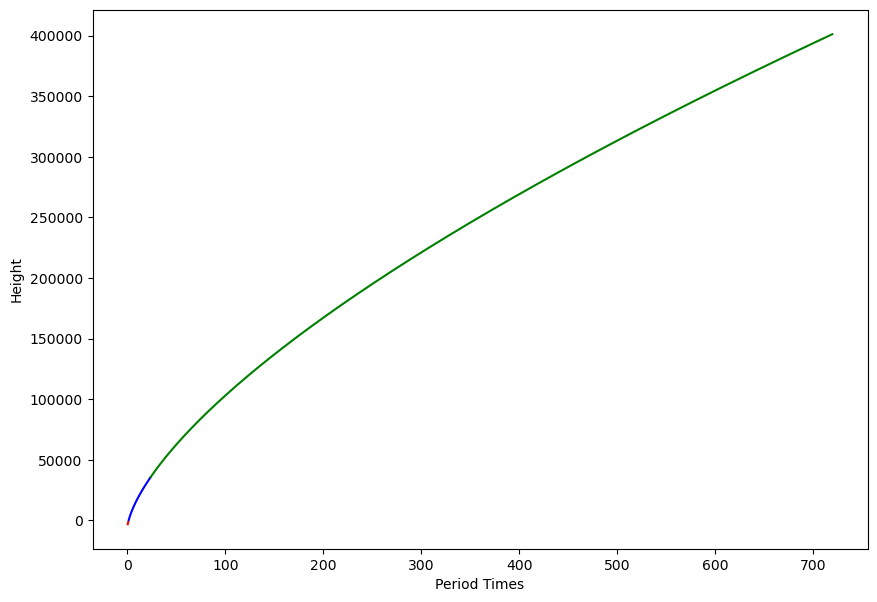

In [9]:
from matplotlib import pyplot as plt

periods = np.arange(0.5, 30.0*24.0, 0.5)*3600.0
heights = altitude(periods)
periods /= 3600
NegHeights = heights[heights<0]
PosHeights = heights[(periods>1) & (periods<23.93)]
GeoHeights = heights[(periods>23.93)]
NegTimes = periods[heights<0]
PosTimes = periods[(heights>0) & (periods<23.93)]
GeoTimes = periods[(periods>23.93)]


fig = plt.figure(figsize=(10,7))
plt.plot(NegTimes,NegHeights,c='red')
plt.plot(PosTimes,PosHeights,c='blue')
plt.plot(GeoTimes,GeoHeights,c='green')
plt.xlabel("Period Times")
plt.ylabel("Height")

### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$

In [11]:
def gamma(v):
    #Takes a velocity as one of it's argument, where v is a fraction of the speed of light, c
    g = ((1-(v**2))**-.5)
    return g


def time_elapsed(x, v):
    g = gamma(v)
    t = x/v
    t_prime = g*(t-((v*x)))
    return t, t_prime


#def x_prime(x, v):
#    return gamma(v) * (x - v*t)
#def t_prime(x, v):
 #   return gamma(v) * (t-(v*x))



#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [13]:
print(time_elapsed(10, 0.9), time_elapsed(10, 0.98), time_elapsed(10, 0.999))

(11.11111111111111, 4.843221048378526) (10.204081632653061, 2.0305866063400337) (10.01001001001001, 0.44754932744961096)


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [20]:
def x(a, b, c):
    root = ((b**2) - (4*a*c))**0.5
    xplus = ((-1*b) + root)/(2*a)
    xneg = ((-1*b) - root)/(2*a)
    return xplus, xneg

print(x(0.001, 1000, 0.001))

(-9.999894245993346e-07, -999999.999999)


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [40]:
def x(a, b, c):
    x = [0, 0, 0, 0]
    root = ((b**2) - (4*a*c))**0.5
    x[0] = ((-1*b) + root)/(2*a)
    x[1] = ((-1*b) - root)/(2*a)

    x[2] = (2*c)/((-1*b) - root)
    x[3] = (2*c)/((-1*b) + root)
    return x
    
print(x(0.001, 1000, 0.001))

[-9.999894245993346e-07, -999999.999999, -1.000000000001e-06, -1000010.5755125057]


In [56]:
def x(a, b, c):
    x = [0, 0, 0, 0]
    root = ((b**2) - (4*a*c))**0.5
    x[0] = ((-1*b) + root)/(2*a)
    x[1] = ((-1*b) - root)/(2*a)

    x[2] = (2*c)/((-1*b) - root)
    x[3] = (2*c)/((-1*b) + root)

    highest = -1
    i = 0
    for ans in x:
        i+=1
        test = a*(ans**2) + (b*ans) + c
        if test > highest:
            higest = test
            highest_i = i

    if highest_i == 0 or highest_i == 1:
        return x[2], x[3]
    else: 
        return x[0], x[1]

print(x(0.001, 1000, 0.001))

(-9.094947017729282e-09, -100000000.0)


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases. 

__(NOTE: MANY Online quadratic equation are WRONG, so careful how you check!!!).__